# Project: Movie recommandation system

## WEEK 1
**Data Gatharing and Data Wrangling**

**In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.**

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [400]:
#loading a dataset
df_credits = pd.read_csv('tmdb_5000_credits.csv')
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [401]:
df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [402]:
df_credits.shape

(4803, 4)

In [403]:
df_movies.shape

(4803, 20)

**df_credits has 4803 rows and 4 columns while df_mov has 4803 rows and 20 columns. Let's explore further**

In [404]:
sum(df_credits.duplicated())

0

In [405]:
sum(df_movies.duplicated())

0

In [406]:
df_credits.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

**Datatypes of df_credits as shown above**

In [407]:
df_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

**Datatypes of df_mov as shown above**

In [408]:
# Check for unique values in each variable in the first dataset
df_credits.nunique()

movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64

**While there are 4803 movies in total, there are only 4800 unique titles which suggest the presence of duplicates**

In [409]:
# Check for unique values in each variable in the second dataset
df_movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [410]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [411]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Explore further the count of each unique value in the `status` variable as mentioned above**

In [412]:
df_movies.status.value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

**As the presence of null values is detected above, we need to see the null counts in each variable of df_mov**

In [413]:
df_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

**As you see above There are huge number of null counts in `homepage` followed by `tagline`. These are the variables which we might not even require in our further analysis**

**As we saw above `original_title` and `title` unique values did not match, so we need to explore them further**

In [414]:
df_movies[['original_title', 'title']].query('original_title != title')

,original_title,title
97,シン・ゴジラ,Shin Godzilla
215,4: Rise of the Silver Surfer,Fantastic 4: Rise of the Silver Surfer
235,Astérix aux Jeux Olympiques,Asterix at the Olympic Games
317,金陵十三釵,The Flowers of War
474,Évolution,Evolution
...,...,...
4699,Lumea e a mea,The World Is Mine
4719,Une femme mariée: Suite de fragments d'un film...,The Married Woman
4751,"Gabriela, Cravo e Canela",Gabriela
4790,دایره,The Circle


**So, we saw that there are 261 instances where `original_title` doesn't match with `title`.Therefore, we are on the same place as before that we need to explore `title` column further which we will do in the _Further Exploration and Cleaning_ section in week 2**

## WEEK 2
### Further Exploration and Cleaning 

**In this section of the report, we will explore the dataset, do the cleaning of our dataset for analysis.**

**Filter df_mov to the observations with _Released_ status in the new dataset cl_mov which is always a good decision because we might need the original dataset at any time in the analysis**

In [415]:
cl_movies = df_movies[df_movies['status'] == "Released"]
cl_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [416]:
cl_movies.status.unique()

array(['Released'], dtype=object)

**Now we drop the unnecessary columns**

In [417]:
cl_movies.drop(['homepage', 'keywords', 'original_language', 'original_title', 'tagline', 'overview', 'spoken_languages', 'status'], axis=1, inplace = True)
cl_movies.head(2)
#droping that columns that not required for futher analysis

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\3530887583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies.drop(['homepage', 'keywords', 'original_language', 'original_title', 'tagline', 'overview', 'spoken_languages', 'status'], axis=1, inplace = True)


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [418]:
cl_movies.shape

(4795, 12)

In [419]:
#checking the null values
cl_movies.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

**now this looks better the null counts are less so we directly drop that value rows**

In [420]:
cl_movies.dropna(inplace = True)

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\3828933243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies.dropna(inplace = True)


In [421]:
cl_movies.shape

(4792, 12)

**As we saw in the previous week, the `title` may have duplicates. So, check if there are any duplicates with respect to `title` variable**

In [422]:
cl_movies[cl_movies['title'].duplicated() == True]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,The Host,6.7,537
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,Batman,6.1,203


In [423]:
cl_movies[cl_movies['title'].str.contains('Out of the Blue')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,Out of the Blue,5.9,18


In [424]:
cl_movies[cl_movies['title'].str.contains('The Host')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",72710,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,The Host,6.0,1817
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,The Host,6.7,537


In [425]:
cl_movies[cl_movies['title'].str.contains('Batman')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,Batman v Superman: Dawn of Justice,5.7,7004
119,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",272,115.040024,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2005-06-10,374218673,140.0,Batman Begins,7.5,7359
210,125000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",415,50.073575,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1997-06-20,238207122,125.0,Batman & Robin,4.2,1418
299,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",414,48.205606,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1995-05-31,336529144,121.0,Batman Forever,5.2,1498
428,80000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 14, ""nam...",364,59.113174,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1992-06-19,280000000,126.0,Batman Returns,6.6,1673
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,Batman,7.0,2096
3854,3500000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 16, ""nam...",142061,25.891466,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""W...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-01-18,0,78.0,"Batman: The Dark Knight Returns, Part 2",7.9,419
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,Batman,6.1,203


**So, we observed that our intuition was wrong and there can be two or more movies with the same name**

**copy of df_credtis as cl_cr to exploration and cleaning**

In [426]:
cl_cr = df_credits

In [427]:
cl_cr.drop(['crew'], axis=1, inplace=True)
cl_cr.head(2)
#dropping unnecessary columns

,movie_id,title,cast
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."


In [428]:
#changing the data type of release_date
cl_movies['release_date'] = pd.to_datetime(cl_movies['release_date'])
cl_movies.dtypes

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\2476719303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies['release_date'] = pd.to_datetime(cl_movies['release_date'])


budget                           int64
genres                          object
id                               int64
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

**Now, in this still there are variables which we are finding difficult to explore and use it further. we trie to resolve one such variable `genres`**

In [429]:
x = []
for item in cl_movies['genres']:
    for dice in item:  
        for value in dice:
            x.append(value)
x[0:10]

['[', '{', '"', 'i', 'd', '"', ':', ' ', '2', '8']

In [430]:
cl_movies['genres'].items()

In [431]:
genre_details = list(map(str,(cl_movies['genres'])))
genre_details[0:10]

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]',
 '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": 

In [432]:
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('[')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)
print(genre[0:10])

['', '{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]', '{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]', '{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]', '{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]', '{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]', '{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]', '{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]', '{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]', '{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}]']


## WEEK 3
### Data analysis

**this part will help us to explore deeper and try to look at some specific areas for research. We will do this part stepwise as we have been doing till now.** 

In [433]:
#look at the variables that you have at present in cl_movies
cl_movies.head(10)

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,Batman v Superman: Dawn of Justice,5.7,7004


While the exploration of **genres** column was being done in the last cells of **Data Cleaning** section (from cells 32-35), we observed that we can't do much operations over this column due to limitation of the present knowledge of python which is out of the scope of this report.

**This column has data in zip format which can't be analysed further through present knowledge. Other columns in similar format are _production_companies_ and _production_countries_. So, at present, these columns are of no use and we need to drop these columns.**

In [434]:
cl_movies.drop(['genres', 'production_companies', 'production_countries'], axis=1, inplace=True)
cl_movies.head(2)

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\3736176355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies.drop(['genres', 'production_companies', 'production_countries'], axis=1, inplace=True)


,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [435]:
#see the descriptive statistics of the data
cl_movies.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4.792000e+03,4792.000000,4792.000000,4792,4.792000e+03,4792.000000,4792.000000,4792.000000
mean,2.910776e+07,56834.982679,21.540728,2002-12-21 15:10:13.021702656,8.244929e+07,106.937396,6.095597,691.791110
min,0.000000e+00,5.000000,0.000372,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.052110e+05,9008.750000,4.738475,1999-07-01 12:00:00,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14580.000000,12.969129,2005-09-26 12:00:00,1.928273e+07,104.000000,6.200000,236.500000
75%,4.000000e+07,58428.750000,28.364400,2011-02-11 18:00:00,9.325544e+07,118.000000,6.800000,738.500000
max,3.800000e+08,447027.000000,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000
std,4.074753e+07,88190.236903,31.837061,NaN,1.629963e+08,22.519776,1.184029,1235.565038


In [436]:
cl_cr.head(10)

,movie_id,title,cast
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B..."


**The _cast_ column in** ***cl_cr*** **is similar to _genre_ in cl_mov. Basically, now** ***cl_cr*** **dataset is of no use to us because of the limitation of the analysis.**  

**Let's further explore `revenue` variable in cl_mov that looks like our variable of interest for analysis and try to compare it's values to overall mean**

In [437]:
mean_rev = cl_movies['revenue'].mean()
mean_rev

82449291.67591819

In [438]:
mov_revup = cl_movies.query('revenue > 82449291.67591819')
mov_revup.count()

budget          1307
id              1307
popularity      1307
release_date    1307
revenue         1307
runtime         1307
title           1307
vote_average    1307
vote_count      1307
dtype: int64

**Although the values look good, but checking if there are any zero values in `revenue` and other variable that is relatable i.e. `budget`**

In [439]:
cl_movies.query('revenue == 0 or budget == 0')

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count
83,27000000,79698,2.418535,2015-02-13,0,109.0,The Lovers,4.8,34
135,150000000,7978,21.214571,2010-02-11,0,102.0,The Wolfman,5.5,549
265,0,10588,18.251129,2003-11-21,0,82.0,The Cat in the Hat,4.9,366
309,84000000,10214,17.815595,2005-02-18,0,94.0,Son of the Mask,3.6,338
321,0,77953,16.460356,2012-08-09,104907746,85.0,The Campaign,5.6,578
...,...,...,...,...,...,...,...,...,...
4797,0,67238,0.022173,2005-03-12,0,80.0,Cavite,7.5,2
4799,9000,72766,0.642552,2011-12-26,0,85.0,Newlyweds,5.9,5
4800,0,231617,1.444476,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6
4801,0,126186,0.857008,2012-05-03,0,98.0,Shanghai Calling,5.7,7


In [440]:
cl_movies.query('revenue == 0 or budget == 0').count()

budget          1564
id              1564
popularity      1564
release_date    1564
revenue         1564
runtime         1564
title           1564
vote_average    1564
vote_count      1564
dtype: int64

**Looks like there are quite many observations where budget and revenue have zero values. So, removing all these observations would impact our analysis on a larger scale and we might miss some useful information.**

**Therefore, Replacing the zero values in both the columns with their respective means**

In [441]:
cl_movies.replace({'revenue': {0: mean_rev}}, inplace = True)
cl_movies.query('revenue == 0 or budget == 0').count()

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\3918521102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies.replace({'revenue': {0: mean_rev}}, inplace = True)


budget          1031
id              1031
popularity      1031
release_date    1031
revenue         1031
runtime         1031
title           1031
vote_average    1031
vote_count      1031
dtype: int64

In [442]:
cl_movies.replace({'budget': {0: cl_movies['revenue'].mean()}}, inplace = True)
cl_movies.query('revenue == 0 or budget == 0').count()

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\2015776218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies.replace({'budget': {0: cl_movies['revenue'].mean()}}, inplace = True)


budget          0
id              0
popularity      0
release_date    0
revenue         0
runtime         0
title           0
vote_average    0
vote_count      0
dtype: int64

**Similar as above, let's check for another variable of interest i.e. `runtime`**

In [443]:
cl_movies.query('runtime == 0').count()

budget          33
id              33
popularity      33
release_date    33
revenue         33
runtime         33
title           33
vote_average    33
vote_count      33
dtype: int64

**Looks like, here also we need to replace the zero values with the mean**

In [444]:
mean_rt = cl_movies['runtime'].mean()
mean_rt

106.93739565943238

In [445]:
cl_movies.replace({'runtime': {0: mean_rt}}, inplace = True)
cl_movies.query('runtime == 0').count()

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\2852792845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies.replace({'runtime': {0: mean_rt}}, inplace = True)


budget          0
id              0
popularity      0
release_date    0
revenue         0
runtime         0
title           0
vote_average    0
vote_count      0
dtype: int64

**Now, our next variable of interest is `release_date`. But date alone would not be of much use since time variables are best used in terms of years. months, days, etc when related to other variables for analysis.**

**So let's explore `release_date` further in terms of year, month and weekday**

In [446]:
# Add a year column using release_date
cl_movies['year'] = cl_movies['release_date'].dt.year
cl_movies.head(10)

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\679234678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies['year'] = cl_movies['release_date'].dt.year


,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year
0,237000000.0,19995,150.437577,2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009
1,300000000.0,285,139.082615,2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000.0,206647,107.376788,2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015
3,250000000.0,49026,112.312950,2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012
4,260000000.0,49529,43.926995,2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012
5,258000000.0,559,115.699814,2007-05-01,8.908716e+08,139.0,Spider-Man 3,5.9,3576,2007
6,260000000.0,38757,48.681969,2010-11-24,5.917949e+08,100.0,Tangled,7.4,3330,2010
7,280000000.0,99861,134.279229,2015-04-22,1.405404e+09,141.0,Avengers: Age of Ultron,7.3,6767,2015
8,250000000.0,767,98.885637,2009-07-07,9.339592e+08,153.0,Harry Potter and the Half-Blood Prince,7.4,5293,2009
9,250000000.0,209112,155.790452,2016-03-23,8.732602e+08,151.0,Batman v Superman: Dawn of Justice,5.7,7004,2016


In [447]:
cl_movies['month'] = cl_movies['release_date'].dt.month
cl_movies.head(5)

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\2872173224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies['month'] = cl_movies['release_date'].dt.month


,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year,month
0,237000000.0,19995,150.437577,2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,12
1,300000000.0,285,139.082615,2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5
2,245000000.0,206647,107.376788,2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015,10
3,250000000.0,49026,112.312950,2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012,7
4,260000000.0,49529,43.926995,2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012,3


In [448]:
cl_movies['day'] = cl_movies['release_date'].dt.weekday
cl_movies.head(2)

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\2027248829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies['day'] = cl_movies['release_date'].dt.weekday


,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year,month,day
0,237000000.0,19995,150.437577,2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,12,3
1,300000000.0,285,139.082615,2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,5


**Now, we might find interest in knowing about the profits that films have made. So, we can get the profit values bu using `revenue` and `budget` values as**

<b>$revenue - budget = profit$</b>

In [449]:
cl_movies['profit'] = cl_movies['revenue'] - cl_movies['budget']
cl_movies.profit.head(2)

C:\Users\ommak\AppData\Local\Temp\ipykernel_6924\679012894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_movies['profit'] = cl_movies['revenue'] - cl_movies['budget']


0    2.550965e+09
1    6.610000e+08
Name: profit, dtype: float64

#### Changes made in addition to the resolved issues:
1. Dropped the columns `genres`, `productioncompanies_` and `productioncountries_`.
2. Left the df_credits dataset for further analysis
3. Replace the zero values in `revenue` and `budget` columns with their respective means
4. Replace the zero values in `runtime` with its mean
5. Added four new columns of `year`, `month`, `day` and `profit`

## WEEK 3
### Exploratory Data Analysis
#### This phase involved advanced visualization techniques, statistical testing, and deeper exploration of relationships between variables. 

In [450]:
cl_movies.head(5)

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year,month,day,profit
0,237000000.0,19995,150.437577,2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,12,3,2.550965e+09
1,300000000.0,285,139.082615,2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,5,6.610000e+08
2,245000000.0,206647,107.376788,2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015,10,0,6.356746e+08
3,250000000.0,49026,112.312950,2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012,7,0,8.349391e+08
4,260000000.0,49529,43.926995,2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012,3,2,2.413910e+07


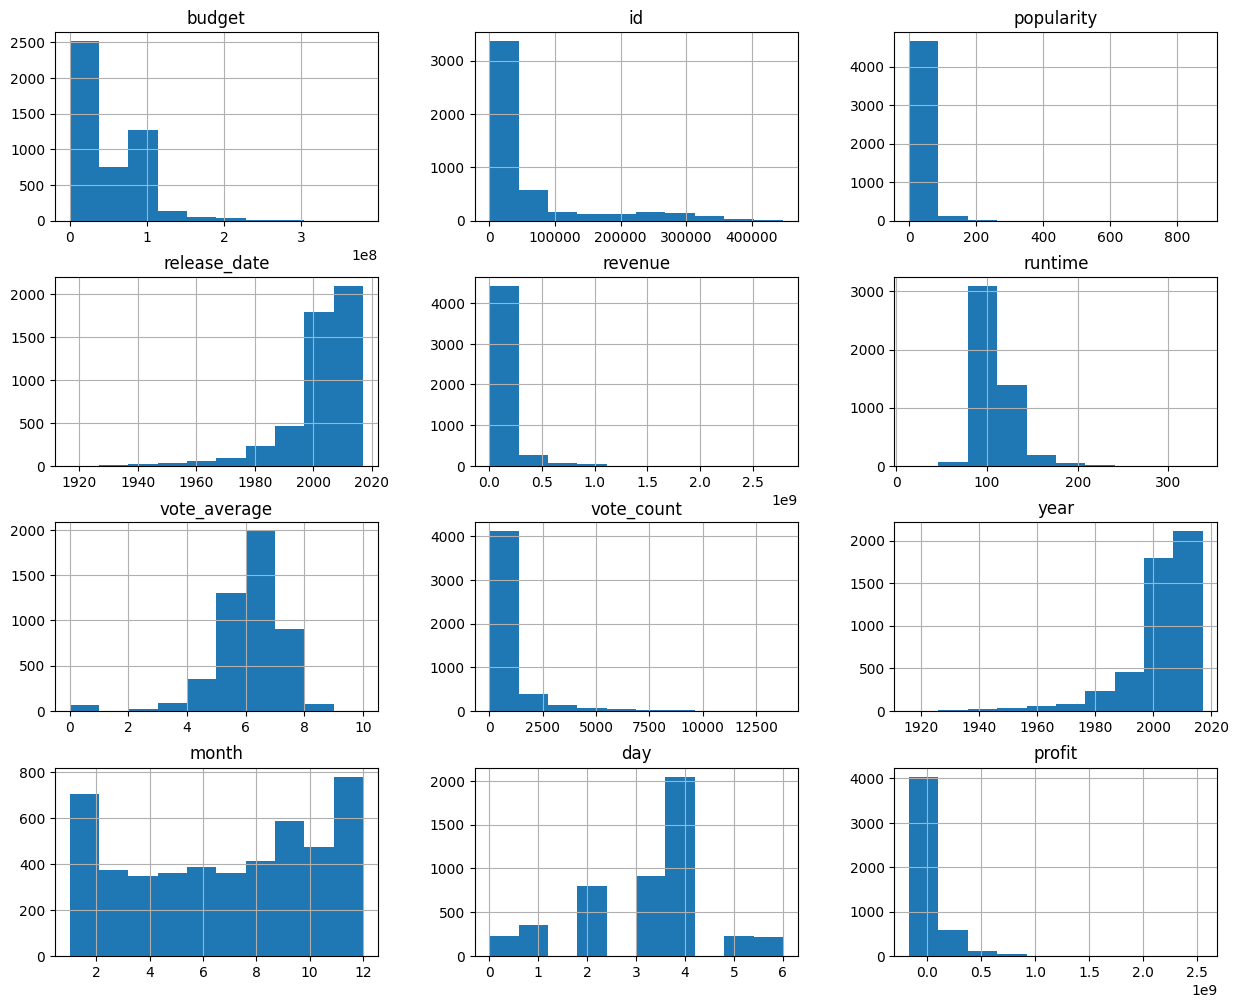

In [451]:
cl_movies.hist(figsize = (15,12));

**From this type of graph we oberseved this things**
1. Most movies lie in the budget range 0 to 0.5 on a e to the power 8 scale
2. Most movies were made in the months of January and December
3. Most movies have popularity between 0 to 100 
4. Many movies have negative profit values which suggests loss making movies
5. Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale
6. Most movies have runtime in the range of 75 to 150 
7. Vote average has a bit scattered distribution than other variables with most movies lying in the range of 6-7 voting average
8. Most movies have been released between the years 2000 and 2015 

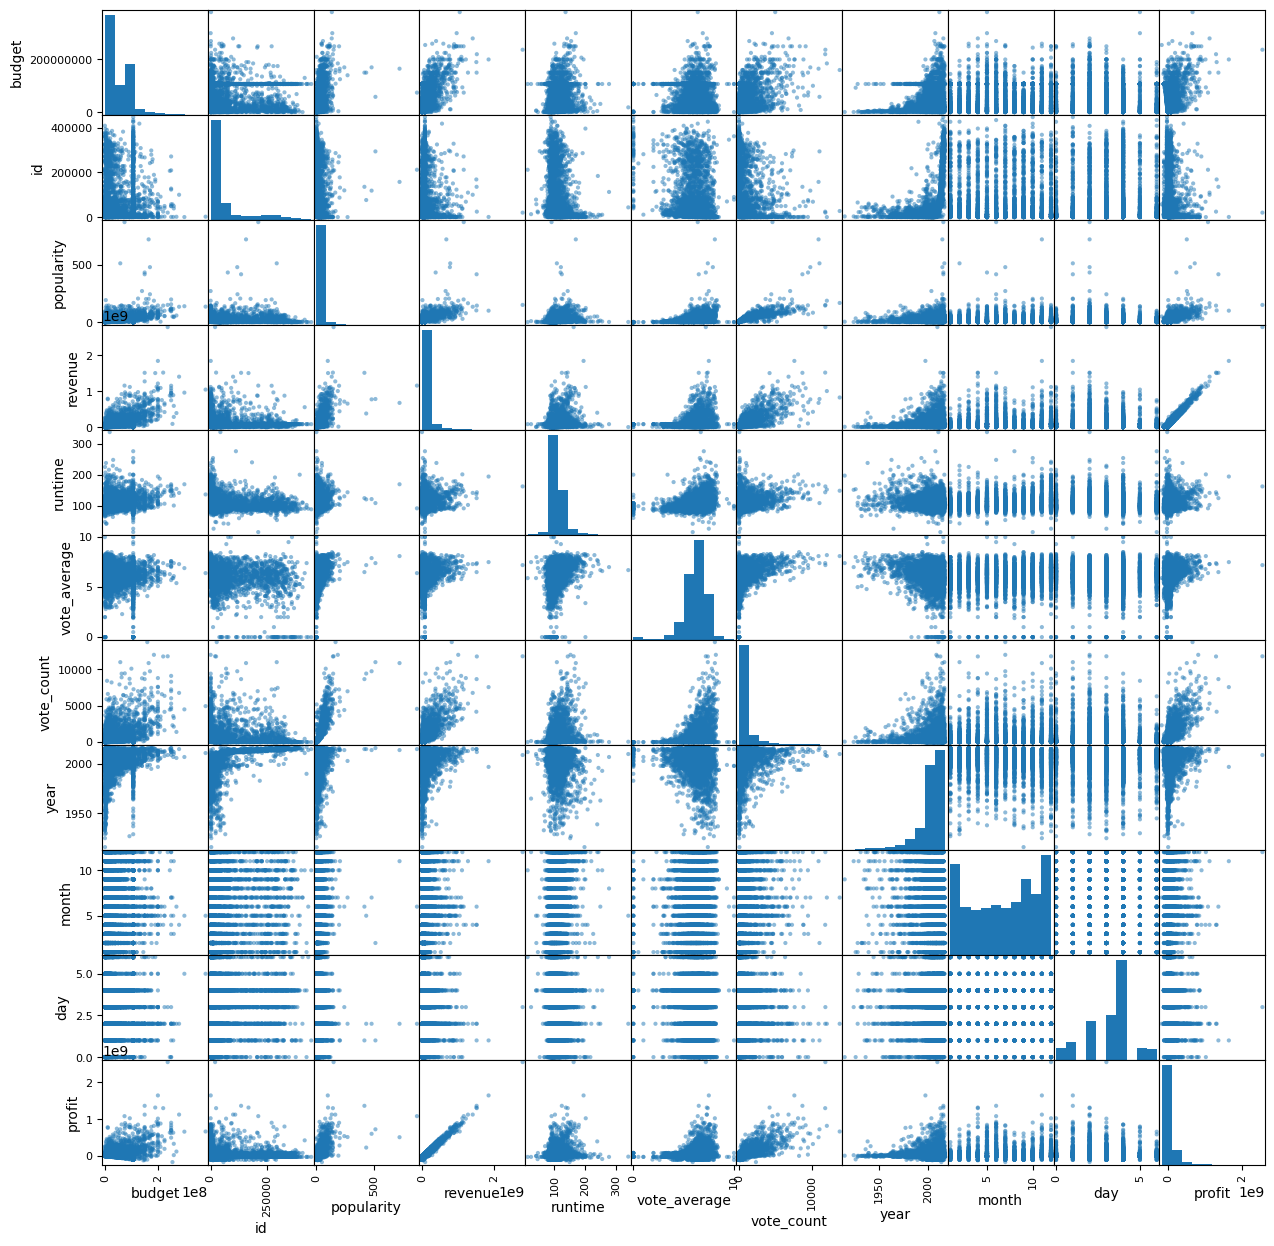

In [452]:
pd.plotting.scatter_matrix(cl_movies, figsize = (15,15));

Among these scatterplots we will observe our relations of interest:
1. Profit vs Popularity shows positive but low correlation.
2. Profit vs Revenue shows the highest positive correlation
3. Profit vs Runtime show positive but very low correlation
4. Vote Average vs Runtime also show positive but low correlation
5. Popularity vs runtime also has very low but positive correlation

In [453]:
cl_movies.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year,month,day,profit
0,237000000.0,19995,150.437577,2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,12,3,2.550965e+09
1,300000000.0,285,139.082615,2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,5,6.610000e+08
2,245000000.0,206647,107.376788,2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015,10,0,6.356746e+08
3,250000000.0,49026,112.312950,2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012,7,0,8.349391e+08
4,260000000.0,49529,43.926995,2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012,3,2,2.413910e+07


In [454]:
cl_movies.count()

budget          4792
id              4792
popularity      4792
release_date    4792
revenue         4792
runtime         4792
title           4792
vote_average    4792
vote_count      4792
year            4792
month           4792
day             4792
profit          4792
dtype: int64

### So after this EDA -cilent gives us Research questions to solve that using EDA...to gain our knowledge in EDA. One of the Question is discuss and explore furthur

### Research Question : Which weekdays as release days turn out to be most lucky for movies in terms of popularity and profit?

**step-1. To analyze this, first seperate out the variables that you want in your analysis and group them by weekdays with mean of other dependent variables**

In [455]:
# Seperate the necessay variables and groupby weekdays 
df1 = cl_movies.groupby('day')[['day', 'profit', 'popularity']]
df1.head(2)

,day,profit,popularity
0,3,2.550965e+09,150.437577
1,5,6.610000e+08,139.082615
2,0,6.356746e+08,107.376788
3,0,8.349391e+08,112.312950
4,2,2.413910e+07,43.926995
5,1,6.328716e+08,115.699814
6,2,3.317949e+08,48.681969
8,1,6.839592e+08,98.885637
11,3,3.860907e+08,107.928811
17,5,6.657138e+08,135.413856


In [456]:
# Take the mean of dependent variables
df1_v1 = df1.mean()
df1_v1

,day,profit,popularity
day,,,
0,0.0,6.462294e+07,21.081432
1,1.0,8.522100e+07,26.415341
2,2.0,9.529267e+07,32.694124
3,3.0,6.292755e+07,24.703346
4,4.0,3.190475e+07,16.303436
5,5.0,5.064400e+07,16.916489
6,6.0,3.165240e+07,14.356027


**Step-2. Take the overall mean of profit and popularity(dependent variables) for comparison in the graph**

In [457]:
pf_mean = cl_movies.profit.mean()
pf_mean

54737462.22245609

In [458]:
pt_mean = cl_movies.popularity.mean()
pt_mean

21.540727889607684

**step-3. Define the variables to be used for index, width and xticks**

In [459]:
ind = np.arange(len(df1.nunique()['day']))
width = 0.35
ind + width

array([0.35, 1.35, 2.35, 3.35, 4.35, 5.35, 6.35])

**step-4. Define the order of weekdays with their id to map with the dataframe**

In [460]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sortIndex =dict(zip(sorter,range(len(sorter))))
sortIndex

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

**Now our dataframe is ready to be plotted as a bar chart**

**step-5. Check the index order to be used as labels for xticks**

In [461]:
df1_v1.index

Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='day')

**step-6. Plot the bar chart for profit comparisons**

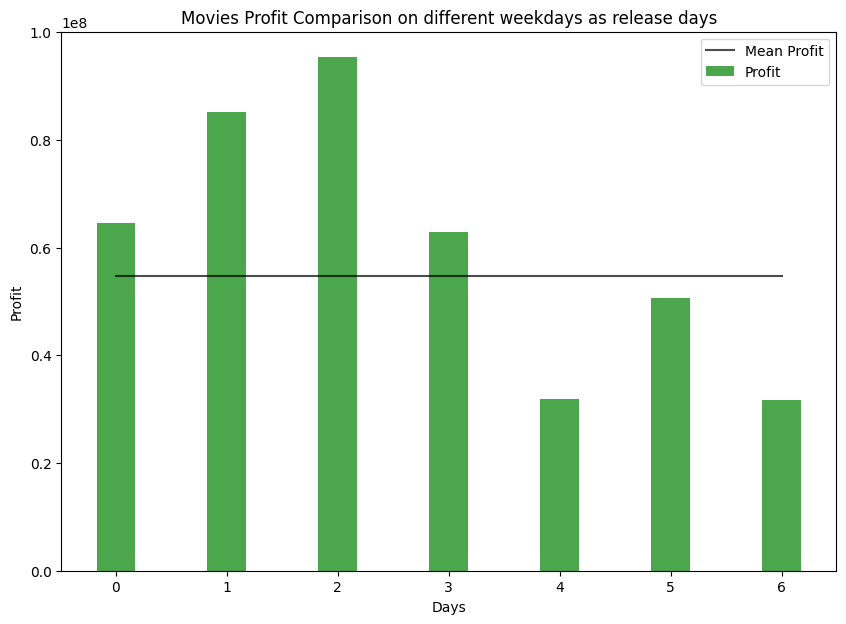

In [462]:
plt.figure(figsize=(10, 7))

pro = plt.bar(ind, df1_v1['profit'], width, color = 'green', alpha=.7, label='Profit')
plt.plot(ind, np.repeat(pf_mean, 7), '-', color = 'black',  alpha=.7, label='Mean Profit')

plt.ylabel('Profit')
plt.xlabel('Days')
plt.title('Movies Profit Comparison on different weekdays as release days')
plt.xticks(ind, df1_v1.index)
plt.legend()

**Observations:**
1. Wednesday has the highest average profit and Friday has the lowest average profit for the movies released on those days.
2. Monday, Tuesday, Wednesday and Thursday have average profits above the overall mean profit value.

**step-7. Plot the bar chart for popularity comparisons**

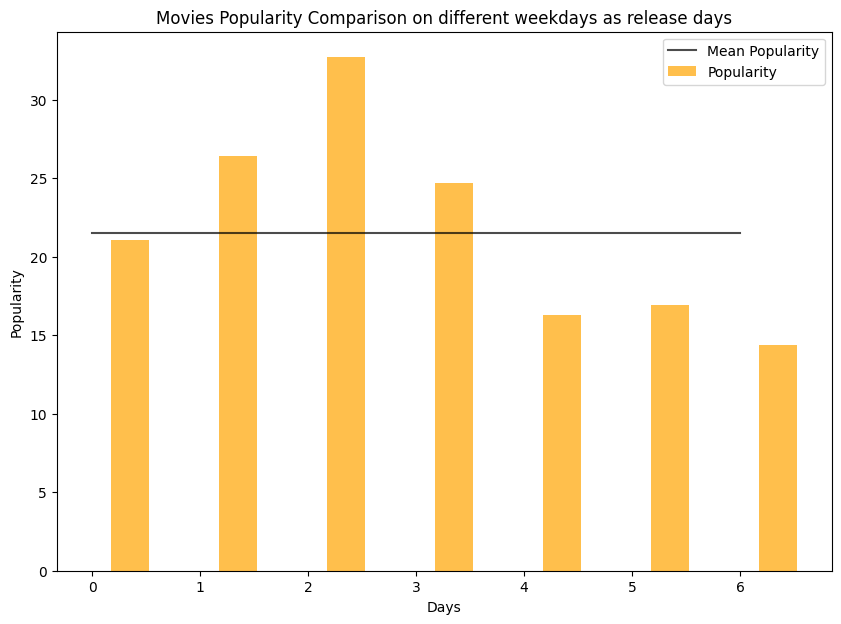

In [463]:
plt.figure(figsize=(10, 7))

pop = plt.bar(ind+width, df1_v1['popularity'], width, color = 'orange', alpha=.7, label='Popularity')
plt.plot(ind, np.repeat(pt_mean, 7), '-', color = 'black',  alpha=.7, label='Mean Popularity')

plt.ylabel('Popularity')
plt.xlabel('Days')
plt.title('Movies Popularity Comparison on different weekdays as release days')
plt.xticks(ind, df1_v1.index)

plt.legend()

**Observations:**
1. Wednesday has the highest average popularity and Sunday has the lowest average popularity for the movies released on those days.
2. Tuesday, Wednesday and Thursday have average popularities above the overall mean popularity.

## So this are the progress status of 4 weeks